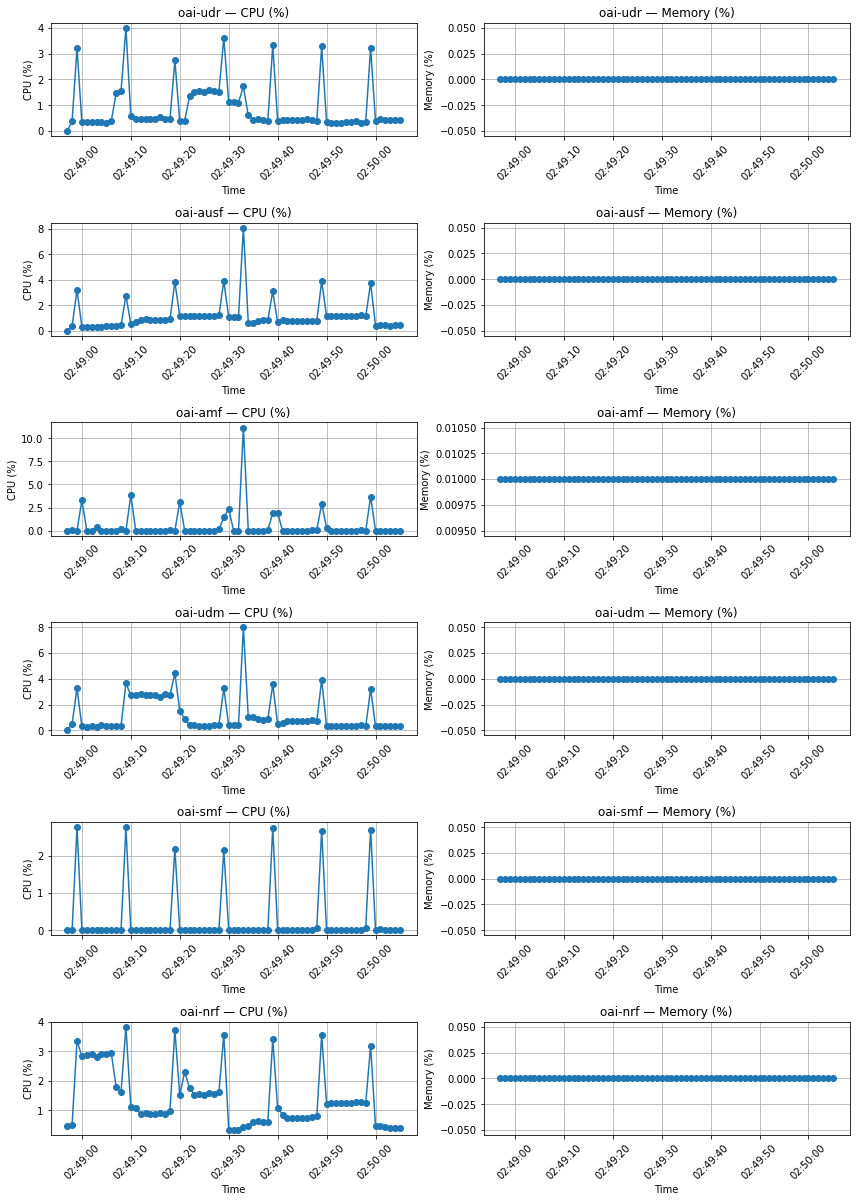

In [3]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt

CSV_FILE = "oai_core_stats.csv"  # change if needed
df = pd.read_csv(CSV_FILE)

# Parse & clean
df["timestamp"]   = pd.to_datetime(df["timestamp"], errors="coerce")
df["cpu_percent"] = pd.to_numeric(df["cpu_percent"], errors="coerce")
df["mem_percent"] = pd.to_numeric(df["mem_percent"], errors="coerce")
df = df.dropna(subset=["timestamp", "container", "cpu_percent", "mem_percent"]).sort_values("timestamp")

containers = list(df["container"].dropna().unique())
rows = len(containers)
if rows == 0:
    raise SystemExit("No containers found in CSV.")

# One big grid: rows = containers, cols = [CPU, MEM]
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 2.8 * rows), squeeze=False)

for i, container in enumerate(containers):
    sub = df[df["container"] == container]
    x = sub["timestamp"].to_numpy()

    # CPU (left column)
    y_cpu = sub["cpu_percent"].to_numpy()
    ax = axes[i, 0]
    ax.plot(x, y_cpu, marker="o", linestyle="-")
    ax.set_title(f"{container} — CPU (%)")
    ax.set_xlabel("Time")
    ax.set_ylabel("CPU (%)")
    ax.grid(True)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

    # MEM (right column)
    y_mem = sub["mem_percent"].to_numpy()
    ax = axes[i, 1]
    ax.plot(x, y_mem, marker="o", linestyle="-")
    ax.set_title(f"{container} — Memory (%)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Memory (%)")
    ax.grid(True)
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()
